<a href="https://www.kaggle.com/code/mdsrahman/amazon-review-classification-for-sentiment-analysi?scriptVersionId=156808936" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Objective:**
Design and implement a machine learning model to classify Amazon product reviews as positive or negative using two popular algorithms, Naive Bayes and Logistic Regression. The dataset consists of two columns: 'reviewText' containing the text of the review and 'Positive' where a value of 1 indicates a positive review and 0 indicates a negative review.

**Dataset:**
The dataset includes labeled examples where each review is associated with a binary label, indicating whether the sentiment of the review is positive or negative.

**Tasks:**
**1. Data Preprocessing:**
   
   **- Load the dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from wordcloud import WordCloud
import re
import shap

data= pd.read_csv("/kaggle/input/amazon-dataset/amazon.csv")

**Perform basic exploratory data analysis (EDA).**

View the first few rows

In [2]:
data.head()

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


**Check data types and missing values**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB


Get summary statistics

In [4]:
data.describe()

,Positive
count,20000.000000
mean,0.761650
std,0.426085
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


**- Handle missing values**

In [5]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

data["reviewText"] = data["reviewText"].apply(preprocess_text)
print("Preprocess Data:", data.head())

Preprocess Data:                                           reviewText  Positive
0  this is a one of the best apps acording to a b...         1
1  this is a pretty good version of the game for ...         1
2  this is a really cool game there are a bunch o...         1
3  this is a silly game and can be frustrating bu...         1
4  this is a terrific game on any pad hrs of fun ...         1


**- Perform text preprocessing on the 'reviewText' column**

In [6]:
data.dropna(inplace = True)

**2. Data Splitting:**

**Split the dataset into training and testing sets.**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data["reviewText"], data["Positive"], test_size = 0.2, random_state = 42)

**3. Feature Extraction:**

In [8]:
vectorizer = TfidfVectorizer()

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

print(X_train_features.shape)
print(X_test_features.shape)

(16000, 21104)
(4000, 21104)


**4. Model Training:**

**- Implement a Naive Bayes classifier and a Logistic Regression classifier.**

In [9]:
nb_model = MultinomialNB()
lr_model = LogisticRegression()

**- Train both models on the training dataset.**

In [10]:
nb_model.fit(X_train_features, y_train)

MultinomialNB()

In [11]:
lr_model.fit(X_train_features, y_train)

LogisticRegression()

**5. Model Evaluation:**

**- Evaluate the performance of each model on the testing dataset using appropriate metrics (e.g., accuracy, precision, recall, F1-score).**

In [12]:
def evaluate_model(model, X_test, y_test):
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

**- Compare the performance of Naive Bayes and Logistic Regression models.**

In [13]:
print("Naive Bayes Evaluation:")
evaluate_model(nb_model, X_test_features, y_test)
    
print("\nLogistic Regression:")
evaluate_model(lr_model, X_test_features, y_test)

Naive Bayes Evaluation:
Accuracy: 0.7778, Precision: 0.7748, Recall: 0.9977, F1 Score: 0.8723

Logistic Regression:
Accuracy: 0.8972, Precision: 0.9041, Recall: 0.9675, F1 Score: 0.9347


**7. Model Interpretability:**

**- Analyze and interpret the results of the models. Identify key features contributing to positive and negative classifications.**

In [14]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

feature_names = vectorizer.get_feature_names_out()
coefficients = lr_model.coef_[0]

feature_importance_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

top_positive_features = feature_importance_df.sort_values(by="Coefficient", ascending=False).head(10)
top_negative_features = feature_importance_df.sort_values(by="Coefficient").head(10)

print("Top Positive Features:")
print(top_positive_features)

print("\nTop Negative Features:")
print(top_negative_features)

Top Positive Features:
       Feature  Coefficient
11225     love     8.792185
8443     great     8.455654
6092      easy     5.369187
7800       fun     4.754772
2122   awesome     4.684346
2518      best     4.658619
20737    works     4.434474
12445     nice     3.239536
1327   amazing     2.928522
3272       can     2.892711

Top Negative Features:
           Feature  Coefficient
12603          not    -7.252453
20239        waste    -5.504894
5126       deleted    -4.662284
19536  uninstalled    -4.374884
17799        sucks    -4.104906
2823        boring    -4.066113
17702       stupid    -3.997631
19778      useless    -3.630121
5742          dont    -3.583701
20776        worst    -3.524706


**Visualize key features for positive and negative reviews using Naive Bayes**

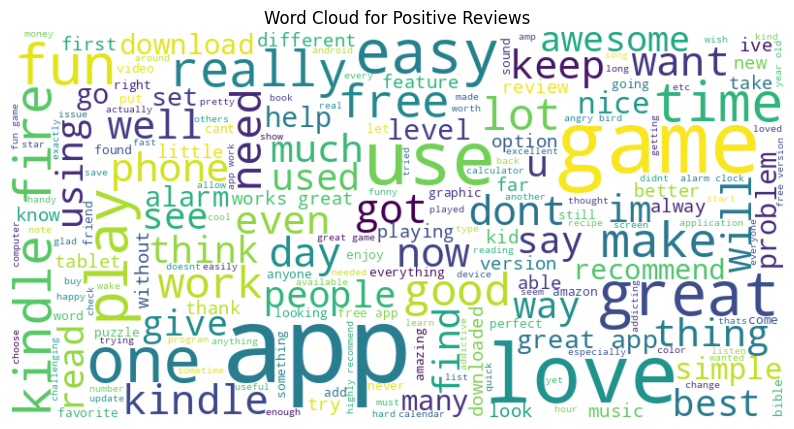

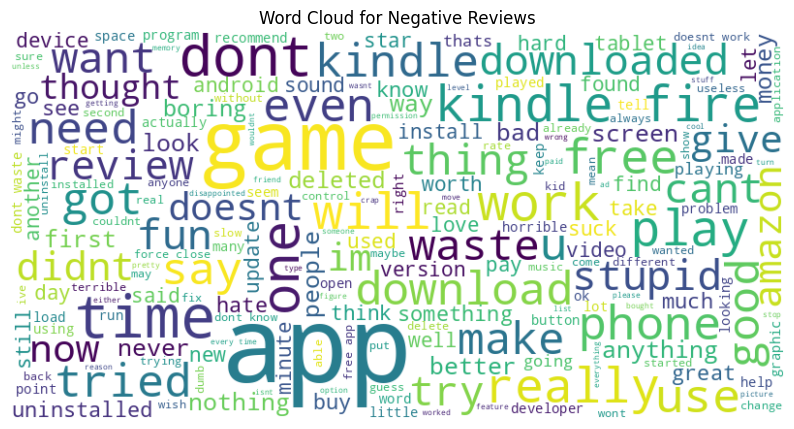

In [15]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()

positive_reviews = ' '.join(data[data['Positive'] == 1]['reviewText'])
negative_reviews = ' '.join(data[data['Positive'] == 0]['reviewText'])

plot_wordcloud(positive_reviews, 'Word Cloud for Positive Reviews')
plot_wordcloud(negative_reviews, 'Word Cloud for Negative Reviews')

**Plotting top positive features vs negative features**

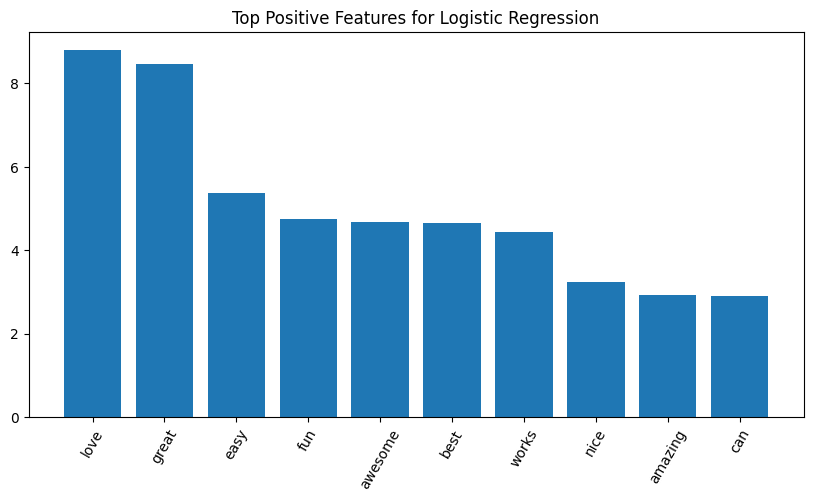

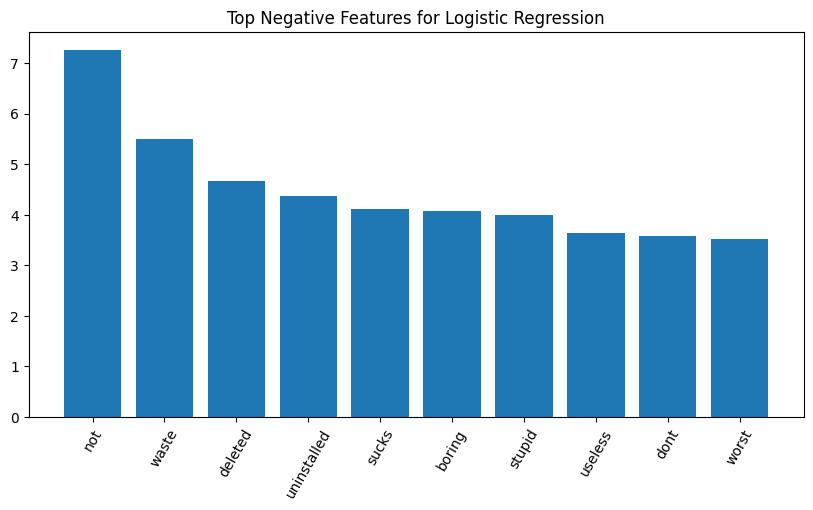

In [16]:
feature_names = vectorizer.get_feature_names_out()
coefs = lr_model.coef_[0]
top_positive_features = sorted(zip(feature_names, coefs), key=lambda x: x[1], reverse=True)[:10]
top_negative_features = sorted(zip(feature_names, coefs), key=lambda x: x[1])[:10]

plt.figure(figsize=(10, 5))
plt.bar(range(len(top_positive_features)), [x[1] for x in top_positive_features])
plt.xticks(range(len(top_positive_features)), [x[0] for x in top_positive_features], rotation=60) 
plt.title("Top Positive Features for Logistic Regression")
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(range(len(top_negative_features)), [-x[1] for x in top_negative_features])  
plt.xticks(range(len(top_negative_features)), [x[0] for x in top_negative_features], rotation=60)  
plt.title("Top Negative Features for Logistic Regression")
plt.show()

**Visualize the average impact of each feature on the model output**

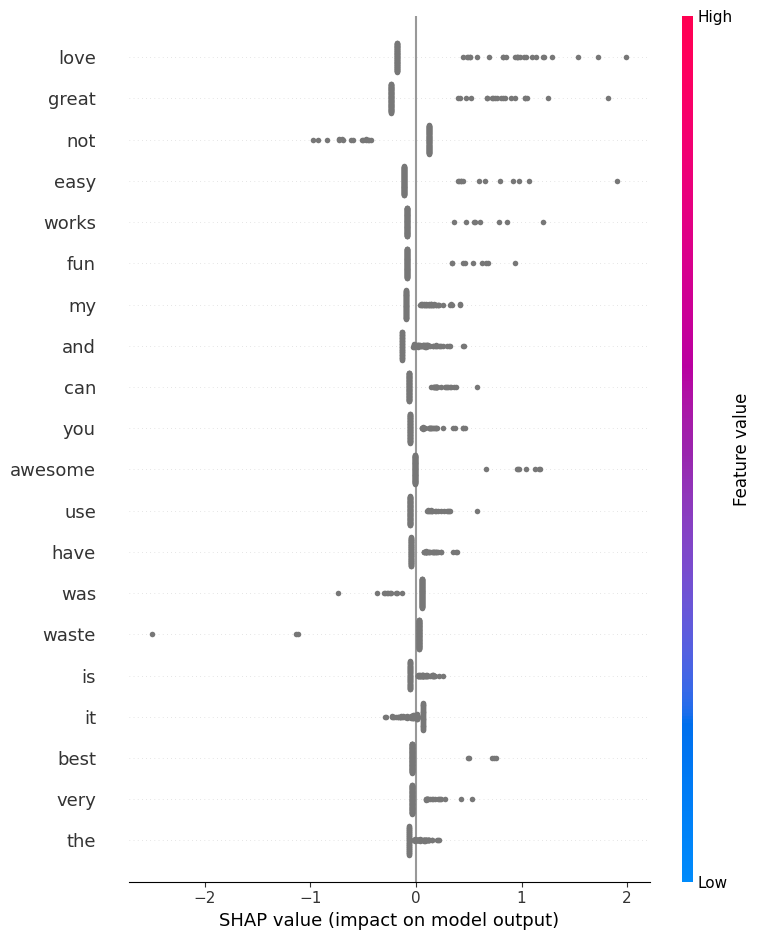

In [17]:
data['reviewText'] = data['reviewText'].str.lower()
data['reviewText'] = data['reviewText'].str.replace('[^\w\s]', '')

X_train, X_test, y_train, y_test = train_test_split(data['reviewText'], data['Positive'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

explainer = shap.Explainer(lr_model, X_train_tfidf)

num_samples = 100
shap_values = explainer.shap_values(X_test_tfidf[:num_samples])

shap.summary_plot(shap_values, X_test_tfidf[:num_samples], feature_names=vectorizer.get_feature_names_out())


**Task 8: Conclusion and Recommendations**

**Summary and Findings:**

**Model Performance:**

**- Naive Bayes:**

Accuracy: 0.7778

Precision: 0.7748

Recall: 0.9977

F1 Score: 0.8723


**- Logistic Regression:**

Accuracy: 0.8972

Precision: 0.9041

Recall: 0.9675

F1 Score: 0.9347


**Interpretability:**

**- Logistic Regression:**

**Top positive features contributing to positive sentiment:**

love: 8.792185

great: 8.455654

easy: 5.369187

fun: 4.754772

awesome: 4.684346

best: 4.658619

works: 4.434474

nice: 3.239536

amazing: 2.928522

can: 2.892711


**Top negative features contributing to negative sentiment:**

not: -7.252453

waste: -5.504894

deleted: -4.662284

uninstalled: -4.374884

sucks: -4.104906

boring: -4.066113

stupid: -3.997631

useless: -3.630121

dont: -3.583701

worst: -3.524706


**Recommendations:**

Based on the analysis, the Logistic Regression model outperformed Naive Bayes in terms of accuracy and F1 score. The interpretability analysis revealed key features influencing positive and negative sentiment.

**1. Experiment with Different Vectorization Techniques:**

Try different text vectorization techniques such as Word Embeddings or Doc2Vec to explore their impact on model performance.

**2. Fine-Tuning Model Hyperparameters:**

Perform hyperparameter tuning for both Naive Bayes and Logistic Regression models to optimize their performance.

**3. Address Class Imbalance:**

If there is a significant class imbalance, consider techniques such as oversampling or undersampling to improve model robustness.

**4. Collect Additional Data:**

Gathering more labeled data can enhance model generalization and improve overall performance.

**5. Continuous Monitoring and Updating:**

Regularly monitor model performance and update the models as new data becomes available to maintain relevance.

**Conclusion:**

In conclusion, the Logistic Regression model, based on TF-IDF features, demonstrated superior performance in sentiment classification. The identified key features provide valuable insights into factors influencing positive and negative sentiments in Amazon product reviews.